## Load the dataset using pandas

In [121]:
import pandas as pd
df=pd.read_csv(r"C:\Users\hp\Downloads\food_orders_new_delhi (1) (2).csv")
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


## Check for the null values

In [122]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

## Replace null values 

In [123]:
df['Discounts and Offers'].fillna(0, inplace=True)
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


## Checking for duplicate rows

In [124]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


## Total amount as delivery fee Called as direct Costs


In [125]:
total_delivery_fee=df["Delivery Fee"].sum()
total_delivery_fee

28620

## Indirect costs Discounts and offers , payment processing charges , refund and cashbacks & commission fees

In [126]:
total_processing_fee=df["Payment Processing Fee"].sum()
total_processing_fee

29832

In [127]:
total_refunds=df["Refunds/Chargebacks"].sum()
total_refunds

28300

In [128]:
total_comission=df["Commission Fee"].sum()
total_comission

126990

## Calculating final order value after the discount applied

In [129]:
import pandas as pd
import re



# Function to preprocess discount values and apply it to the order value
def calculate_discount(row):
    discount_str = row['Discounts and Offers']
    order_value = row['Order Value']

    # Handle missing values and ensure the input is a string
    if pd.isna(discount_str) or not isinstance(discount_str, str):
        return order_value  # No discount applied

    # Extract numerical value from the discount string
    value = re.findall(r'\d+', discount_str)
    if value:
        value = int(value[0])  # Extracted value
        if "%" in discount_str:
            discount = (value / 100) * order_value  # Calculate percentage discount
        else:
            discount = value  # Fixed amount discount
        return order_value - discount
    else:
        return order_value  # No discount applied if no valid discount found

# Create a new column for the final order value after discount
df['Final Order Value'] = df.apply(calculate_discount, axis=1)

In [130]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Final Order Value
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,1818.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,887.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,796.45
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0,1463.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,1942.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,783.75
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0,1627.00
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,31,0,553.00
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,1201.90


In [131]:
total_order_value=df["Order Value"].sum()

In [132]:
total_final_ordervalue=df['Final Order Value'].sum()

In [133]:
total_discount=total_order_value-total_final_ordervalue
total_discount

74289.84999999998

In [134]:
total_indirect_costs=total_processing_fee+total_refunds+total_comission+total_discount
total_indirect_costs

259411.84999999998

In [135]:
total_direct_cost=total_delivery_fee

In [136]:
total_cost=total_indirect_costs+total_direct_cost
total_cost

288031.85

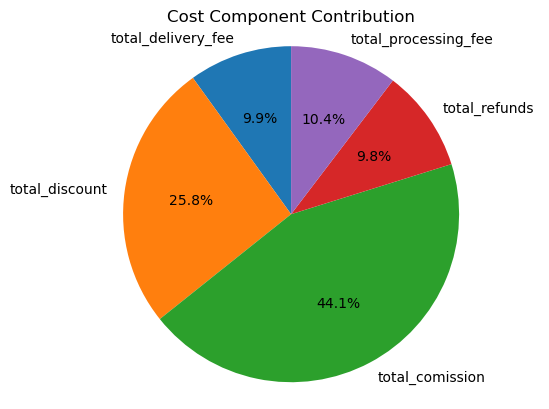

In [137]:
import matplotlib.pyplot as plt

# Step 1: Prepare the data
costs = {
    'total_delivery_fee': 28620,
    'total_discount': 74290,
    'total_comission': 126990,
    'total_refunds': 28300,
    'total_processing_fee': 29832,
}

# Step 2: Calculate total cost and percentages
total_cost = sum(costs.values())
percentages = {k: (v / total_cost) * 100 for k, v in costs.items()}

# Step 3: Prepare data for pie chart
labels = percentages.keys()
sizes = percentages.values()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Add a title
plt.title('Cost Component Contribution')

# Display the pie chart
plt.show()


## The above pie chart gives distribution across components of total cost  beared for order

## Creating a new column as total cost

In [138]:
df["Total cost"] = df["Delivery Fee"] + df["Commission Fee"] + df["Payment Processing Fee"] + df["Refunds/Chargebacks"]
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Final Order Value,Total cost
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,1818.30,197
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,887.40,261
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,796.45,270
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0,1463.00,223
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,1942.00,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,783.75,262
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0,1627.00,202
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,31,0,553.00,115
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,1201.90,233


## Calculating profit per order taking 50% of final order value as raw material cost

In [139]:
df["Profit"] = df["Final Order Value"]/2 - df["Total cost"]
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Final Order Value,Total cost,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,1818.30,197,712.150
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,887.40,261,182.700
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,796.45,270,128.225
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0,1463.00,223,508.500
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,1942.00,210,761.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,783.75,262,129.875
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0,1627.00,202,611.500
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,31,0,553.00,115,161.500
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,1201.90,233,367.950


##total profit and avg profit per order

In [140]:
total_profit=df["Profit"].sum()
avg_profit_per_order=total_profit/1000
print(total_profit)
print(avg_profit_per_order)


276097.575
276.097575


## Filtering out dataset for profit < 0; as rows

In [157]:
rows=df[df["Profit"]<0]
rows.shape

(185, 16)

## filtering out dataset for profit > 0 as row

In [155]:
row=df[df["Profit"]>0]
row.shape

(815, 16)

##average order value & average cost for profit orders

In [143]:
average_value=row["Final Order Value"].mean()
average_value

1136.52490797546

In [144]:
total=row["Total cost"].mean()
total

207.15337423312883

####average order value & average cost for non profit orders

In [145]:
average_value1=rows["Final Order Value"].mean()
average_value1

288.71000000000004

In [146]:
total1=rows["Total cost"].mean()
total1

242.76756756756757

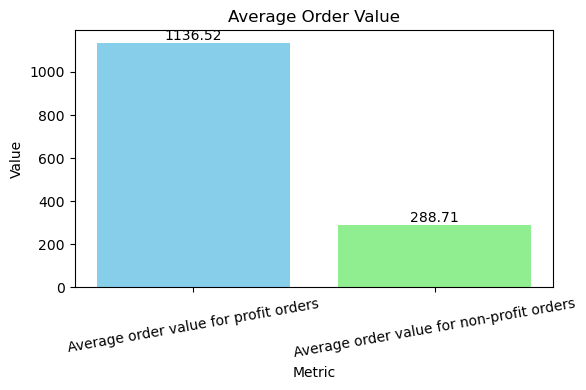

In [147]:
import matplotlib.pyplot as plt

# Sample average values
average_value = 1136.52  # Average order value for profit orders
average_value1 = 288.71  # Average order value for non-profit orders

# Create a bar chart
plt.figure(figsize=(6, 4))  # Set the figure size
bars = plt.bar(['Average order value for profit orders', 'Average order value for non-profit orders'], [average_value, average_value1], color=['skyblue', 'lightgreen'])

# Annotate the bars with the average values
for bar, value in zip(bars, [average_value, average_value1]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}', ha='center', va='bottom')

# Rotate x-axis labels
plt.xticks(rotation=10)

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Average Order Value')

# Adjust layout to make room for rotated labels
plt.tight_layout() 

# Display the plot
plt.show()


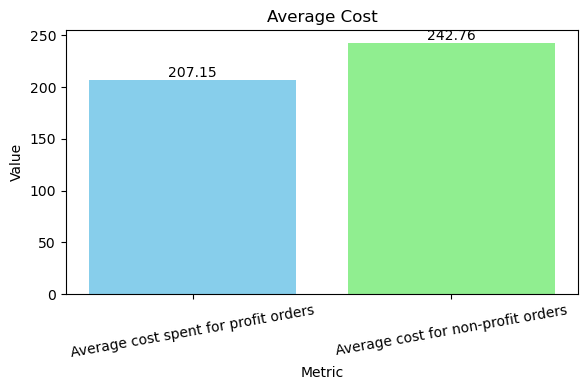

In [148]:
import matplotlib.pyplot as plt

# Sample data
total = 207.15  # Average cost spent for profit orders
total1 = 242.76  # Average cost for non-profit orders

# Create a bar chart
plt.figure(figsize=(6, 4))  # Set the figure size
bars = plt.bar(['Average cost spent for profit orders', 'Average cost for non-profit orders'], [total, total1], color=['skyblue', 'lightgreen'])

# Annotate the bars with the average values
for bar, value in zip(bars, [total, total1]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}', ha='center', va='bottom')

# Rotate x-axis labels
plt.xticks(rotation=10)

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Average Cost')

# Display the plot
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


## Key Findings

## Average Order Value:

Profitable Orders: 1136.52
Non-Profitable Orders: 288.71

## Average Cost:

Profitable Orders: 207.15
Non-Profitable Orders: 242.76


## Analysis
1) Higher Order Values Drive Profitability:
    Profitable orders have a significantly higher average order value compared to non-profitable orders.
    This suggests that the revenue generated from higher-value orders more than compensates for the associated costs, leading to profitability.

2) Cost Management:
    The average cost for profitable orders is lower than for non-profitable orders despite the higher order value.
    Effective cost management in profitable orders might involve economies of scale, better route optimization, or more efficient operations.

## Strategic Recommendations

Based on these insights, here are some strategies to improve overall profitability:

1)Increase Order Value:
    Upselling and Cross-Selling: Encourage customers to add more items to their orders through recommendations, combo deals, or bundles.
    Minimum Order Value for Free Delivery: Implement a minimum order value threshold for free delivery to incentivize higher spending.
   
2)Optimize Costs:
    Delivery Efficiency: Optimize delivery routes and times to reduce delivery costs. This could involve using algorithms for route planning or   consolidating deliveries.
    Operational Efficiency: Streamline operations to reduce handling and preparation times. This might include better inventory management or   automating parts of the order fulfillment process.

3)Discount and Commission Strategy:
    Targeted Discounts: Offer discounts strategically to encourage higher spending. For example, provide percentage-based discounts for orders above a certain value.
    Adjust Commission Rates: Review and adjust commission rates based on order value and profitability. Higher commissions could be charged on higher-value orders while offering lower rates for smaller orders to encourage volume.

4)Customer Segmentation:
    Identify High-Value Customers: Use data to identify and target high-value customers with personalized offers and promotions.
    Loyalty Programs: Implement loyalty programs to retain high-value customers and encourage repeat orders.
    
5)Improve Non-Profitable Orders:
    Analyze and Address Causes: Investigate why certain orders are non-profitable. This could involve looking at specific customer segments, order types, or geographic areas.
    Adjust Pricing and Fees: Consider adjusting pricing, delivery fees, or service charges for low-value orders to cover costs better.

## Impact Simulation

To simulate the financial impact of these strategies, you can adjust the dataset to reflect changes in order values, costs, discounts, and commissions. For example, you can:

Increase order values by a certain percentage and observe the change in profitability.
Reduce costs by optimizing delivery routes and operations and assess the impact on overall profit margins.
Apply targeted discounts and commission adjustments and simulate how these changes affect the bottom line.

## We are visualizing distribution of cost components for non profitable orders and profitable orders

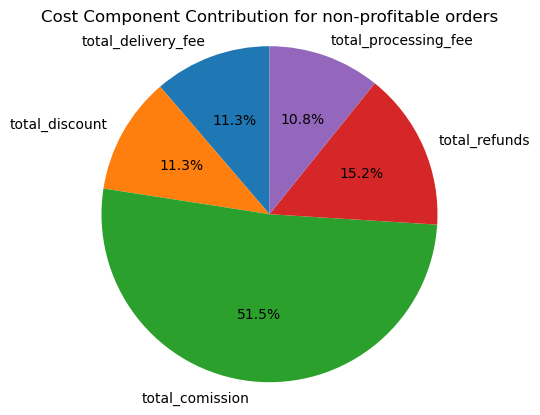

In [149]:
import matplotlib.pyplot as plt

# Step 1: Prepare the data
costs = {
    'total_delivery_fee': rows['Delivery Fee'].sum(),
    'total_discount': rows['Order Value'].sum() - rows['Final Order Value'].sum(),
    'total_comission':  rows['Commission Fee'].sum(),
    'total_refunds': rows['Refunds/Chargebacks'].sum(),
    'total_processing_fee': rows['Payment Processing Fee'].sum()
}

# Step 2: Calculate total cost and percentages
total_cost = rows["Order Value"].sum()
percentages = {k: (v / total_cost) * 100 for k, v in costs.items()}

# Step 3: Prepare data for pie chart
labels = percentages.keys()
sizes = percentages.values()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Add a title
plt.title('Cost Component Contribution for non-profitable orders')

# Display the pie chart
plt.show()


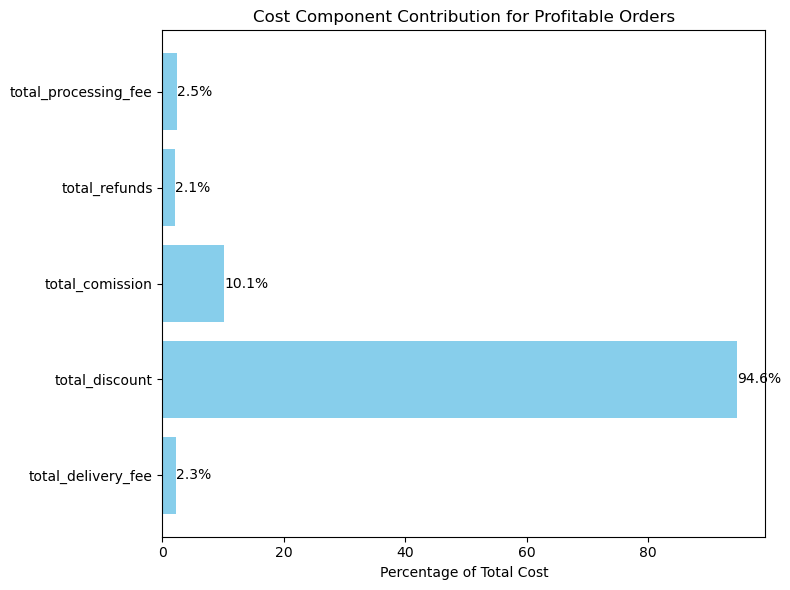

In [150]:
import matplotlib.pyplot as plt

# Step 1: Prepare the data
costs = {
    'total_delivery_fee': row['Delivery Fee'].sum(),
    'total_discount': row['Order Value'].sum() - rows['Final Order Value'].sum(),
    'total_comission':  row['Commission Fee'].sum(),
    'total_refunds': row['Refunds/Chargebacks'].sum(),
    'total_processing_fee': row['Payment Processing Fee'].sum()
}

# Step 2: Calculate total cost and percentages
total_cost = row["Order Value"].sum()
percentages = {k: (v / total_cost) * 100 for k, v in costs.items()}

# Prepare data for bar chart
labels = list(percentages.keys())
sizes = list(percentages.values())

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(labels, sizes, color='skyblue')

# Add percentage labels to each bar
for bar, value in zip(bars, sizes):
    ax.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.1f}%', va='center', ha='left', fontsize=10)

# Add labels and title
ax.set_xlabel('Percentage of Total Cost')
ax.set_title('Cost Component Contribution for Profitable Orders')

# Adjust layout
plt.tight_layout()
plt.show()



By looking at both the visualization we can say that cost for non profitable orders can be reduced in commision fees , processing fees and delivery fees and also avg order value must be increased

## Process we can take to improve profits

 ## 1) The impact of increasing order values by 20% and reducing costs by 10%:

Impact Simulation
To simulate the financial impact of these strategies,we  adjusedt the dataset to reflect changes in order values, costs, discounts, and commissions. For example, you can:

Incred se order values by a certain percentage and observe the change in profitability. Redduce costs by optimizing delivery routes and operations and assess the impact on overall profit margins. Aiedply targeted discounts and commission adjustments and simulate how these changes affect the bottom line.

In [160]:
df["Final Order Value"] = df["Final Order Value"] * 1.20
df["Total cost"] = df["Total cost"] * 0.90


In [161]:
df["Profit_after_simulation"]=df["Final Order Value"]/2 - df ["Total cost"]
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Final Order Value,Total cost,Profit,Profit_after_simulation
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,2400.156,168.435,712.150,1031.643
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,1171.368,223.155,182.700,362.529
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,1051.314,230.850,128.225,294.807
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0,1931.160,190.665,508.500,774.915
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,2563.440,179.550,761.000,1102.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,1034.550,224.010,129.875,293.265
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0,2147.640,172.710,611.500,901.110
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,31,0,729.960,98.325,161.500,266.655
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,1586.508,199.215,367.950,594.039


In [162]:
df.shape

(1000, 16)

In [163]:
rows_after_simulation=df[df["Profit_after_simulation"]<0]
rows_after_simulation.shape

(100, 16)

We can see that after impact simulation the total non profit orders has been reduced from 185 to 100.

## Strategic Recommendations
Based on the insights, here are some strategies to improve overall profitabilit.

## 1) Customer Segmentation: 
Identifying High-Value Customers -->  Using data to identify and target high-value customers with personalized offers and promotions. Loyalty Programs: Implementing loyalty programs to retain high-value customers and encourage repeat orders.

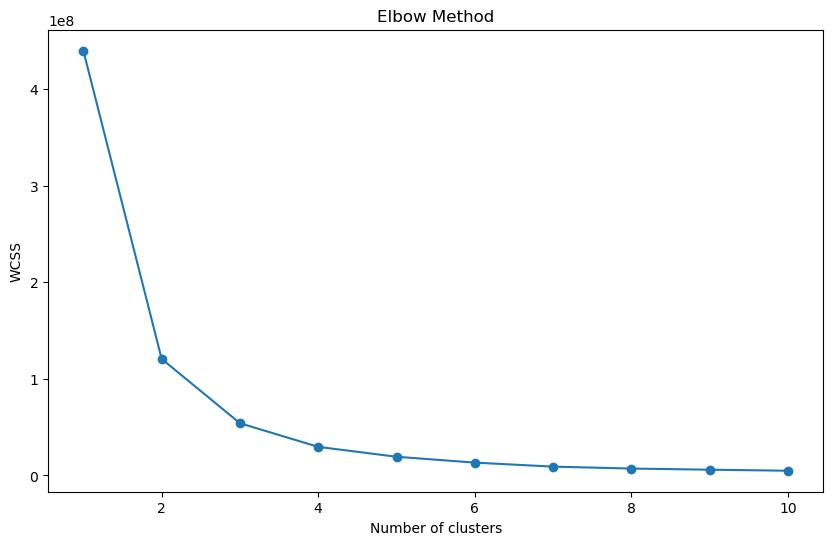

In [183]:
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[['Final Order Value']])
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [189]:
# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Final Order Value']])


   Cluster  count        mean        std    min    25%    50%    75%    max
0        0   71.0  316.323944  47.155904  248.0  281.0  303.0  351.5  414.0
1        1   47.0  530.340426  97.701915  427.0  462.5  489.0  578.0  882.0
2        2   67.0  175.149254  44.691960  104.0  136.5  176.0  207.5  245.0


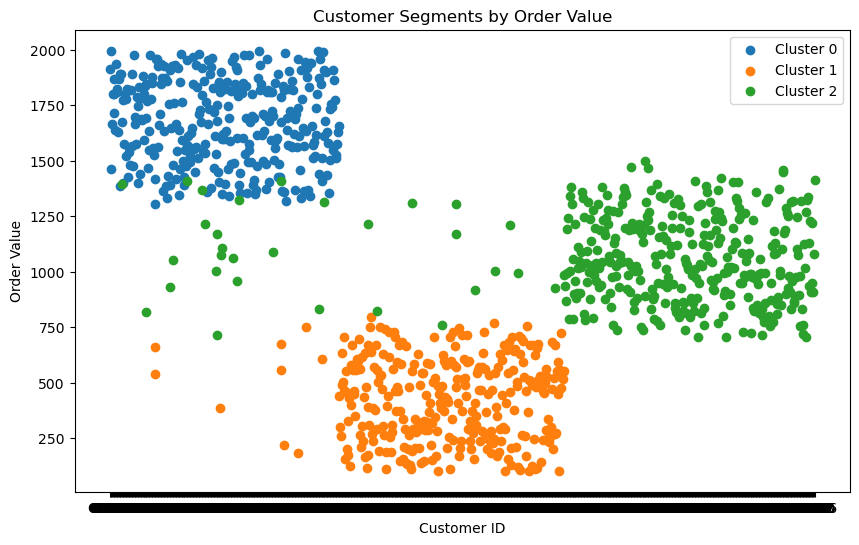

In [190]:
# Analyze cluster characteristics
cluster_summary = rows.groupby('Cluster')['Order Value'].describe().reset_index()
print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(df[df['Cluster'] == i]['Customer ID'],
                df[df['Cluster'] == i]['Order Value'],
                label=f'Cluster {i}')
plt.title('Customer Segments by Order Value')
plt.xlabel('Customer ID')
plt.ylabel('Order Value')
plt.legend()
plt.show()


## Conclusion
Clustering customers based on their order value helped to identify distinct segments, allowing to tailor marketing strategies and promotions to each segment. By focusing on the characteristics of each cluster, we can devise strategies to increase order values, improve customer retention, and enhance overall profitability.

## 2) Predictive Modeling for Profitability
Builded predictive models to identify factors contributing to order profitability and predict whether new orders will be profitable.

Actions:

Used Random Forest Classifier to classify orders as profitable or non-profitable.
Analyzed feature importance to identify key drivers of profitability.
Implemented predictive models to proactively manage unprofitable orders.

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.98      0.99      0.99       194

    accuracy                           0.98       200
   macro avg       0.87      0.75      0.79       200
weighted avg       0.98      0.98      0.98       200

Order Value               0.629037
Commission Fee            0.115037
Payment Processing Fee    0.062870
Delivery Duration         0.062145
Order Hour                0.058387
Delivery Fee              0.036643
Refunds/Chargebacks       0.035881
dtype: float64


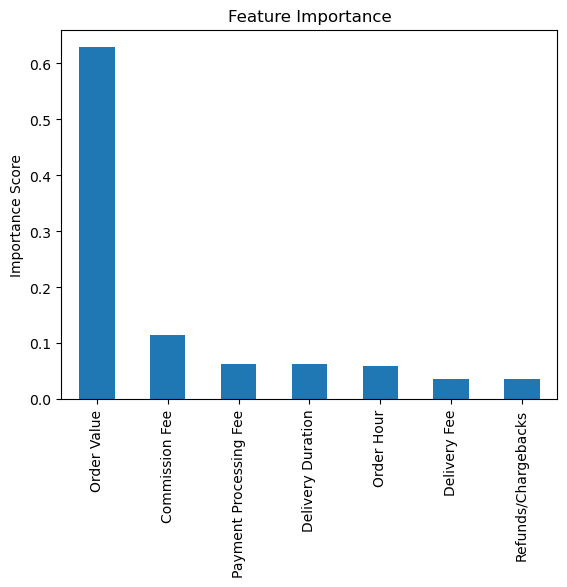

In [193]:
# Convert order and delivery date-times to datetime objects
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

# Create new features
df['Order Hour'] = df['Order Date and Time'].dt.hour
df['Delivery Duration'] = (df['Delivery Date and Time'] - df['Order Date and Time']).dt.total_seconds() / 60

# Calculate profit
df['Profit'] = df['Final Order Value'] - df['Total cost']

# Create a binary target variable: 1 for profitable, 0 for non-profitable
df['Profitable'] = (df['Profit'] > 0).astype(int)

from sklearn.model_selection import train_test_split

# Select features and target variable
features = ['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks', 'Order Hour', 'Delivery Duration']
X = df[features]
y = df['Profitable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Analyze feature importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importance)

# Plot feature importance
import matplotlib.pyplot as plt
feature_importance.plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance Score')
plt.show()



The feature importance plot shows which factors are most influential in determining the profitability of orders. The classification report provides metrics such as precision, recall, and F1-score, indicating the model's performance 98%.

In [199]:
import joblib

# Save the scaler and model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

Predicting for new data , will the order be profitable or not

In [206]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load the scaler and model from .pkl files
scaler = joblib.load('scaler.pkl')
model = joblib.load('random_forest_model.pkl')

# Example new data
new_data = pd.DataFrame({
    'Order Value': [1000],
    'Delivery Fee': [50],
    'Commission Fee': [150],
    'Payment Processing Fee': [30],
    'Refunds/Chargebacks': [0],
    'Order Date and Time': ['2024-05-25 14:00:00'],
    'Delivery Date and Time': ['2024-05-25 14:45:00']
})

# Convert date and time columns to datetime objects
new_data['Order Date and Time'] = pd.to_datetime(new_data['Order Date and Time'])
new_data['Delivery Date and Time'] = pd.to_datetime(new_data['Delivery Date and Time'])

# Create new features
new_data['Order Hour'] = new_data['Order Date and Time'].dt.hour
new_data['Delivery Duration'] = (new_data['Delivery Date and Time'] - new_data['Order Date and Time']).dt.total_seconds() / 60

# Select relevant features
features = ['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks', 'Order Hour', 'Delivery Duration']
new_X = new_data[features]

# Scale the new data
new_X_scaled = scaler.transform(new_X)

# Make predictions
new_predictions = model.predict(new_X_scaled)
new_predictions_proba = model.predict_proba(new_X_scaled)

# Interpret the predictions
profitability = 'Profitable' if new_predictions[0] == 1 else 'Non-Profitable'

print(f'The new order is predicted to be: {profitability}')
print(f'Probability of being Profitable: {new_predictions_proba[0][1]:.2f}')
print(f'Probability of being Non-Profitable: {new_predictions_proba[0][0]:.2f}')


The new order is predicted to be: Profitable
Probability of being Profitable: 1.00
Probability of being Non-Profitable: 0.00


## Conclusion
It has predicted for new data that it will be profitable for you

In [ ]:
df["Discount"] = df["Order Value"] - df["Final Order Value"]
df

## 3) Dynamic Pricing

Implementing  dynamic pricing strategies to optimize order values and profitability.

Actions:

Using regression models to determine the optimal pricing for different times, locations, and customer segments.
Implementing algorithms to adjust prices in real-time based on demand and supply.

In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# Convert order date and time to datetime object
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])

# Create new features
df['Order Hour'] = df['Order Date and Time'].dt.hour
df['Order Day'] = df['Order Date and Time'].dt.dayofweek  # Monday=0, Sunday=6
df['Order Month'] = df['Order Date and Time'].dt.month

# Features to use 
features = ['Order Hour', 'Order Day', 'Order Month', 'Delivery Fee', 'Discount', 'Commission Fee', 'Payment Processing Fee']

# Target variable
target = 'Final Order Value'

# Select features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Save the model
joblib.dump(model, 'dynamic_pricing_model.pkl')

# Example new data for dynamic pricing
new_data = pd.DataFrame({
    'Order Hour': [14],
    'Order Day': [2],  # Wednesday
    'Order Month': [5],  # May
    'Delivery Fee': [50],
    'Discount': [50],  # 10% discount
    'Commission Fee': [50],
    'Payment Processing Fee': [30]
})

# Load the model for prediction
model = joblib.load('dynamic_pricing_model.pkl')

# Predict the optimal price
optimal_price = model.predict(new_data)

print(f'Optimal Price: {optimal_price[0]}')


Optimal Price: 340.9679166666667


## Conclusion
The implementation of dynamic pricing, supported by machine learning, provides a robust framework for optimizing profitability in the food delivery business. By leveraging data-driven insights and predictive analytics, we can make informed decisions that align pricing with cost structures and market demand, ultimately driving greater efficiency and profitability.
We gave a raw data and it predicted its optimal price



## 4) Churn Analysis

Identify customers who are likely to churn and develop strategies to retain them.

Actions:

Build a churn prediction model using customer order history, frequency, and other features.
Offer targeted retention campaigns to at-risk customers.

## 5) Sentiment Analysis and Feedback
Analyze customer feedback to improve service quality and customer satisfaction.

Actions:

Use natural language processing (NLP) to analyze reviews and feedback.
Identify common complaints and areas for improvement.
Implement changes based on feedback to enhance customer satisfaction.

## We are sort of data as of now to do these type of analysis